In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse = pd.read_csv(mouse_drug_data_to_load)
print(mouse.head())
trial = pd.read_csv(clinical_trial_data_to_load)
print(trial.head())

# Combine the data into a single dataset
complete = pd.merge(mouse, trial, how="left", on=["Mouse ID"])
print(complete.head())

# Combine the data into a single dataset


# Display the data table for preview



  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
  Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     f234  Stelasyn          0           45.000000                 0
1     f234  Stelasyn          5           47.313491                 0
2     f234  Stelasyn         10           47.904324                 0
3     f234  Stelasyn         15           48.735197                 1
4     f234  Stelasyn         20           51.112713                 2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume = pd.DataFrame(complete.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()).reset_index()

tumor_volume.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
volume_sem = pd.DataFrame(complete.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()).reset_index()
volume_sem.head()
# Convert to DataFrame

# Preview DataFrame

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
tumor_volume = pd.pivot_table(complete, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)', aggfunc = np.mean)
tumor_volume


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


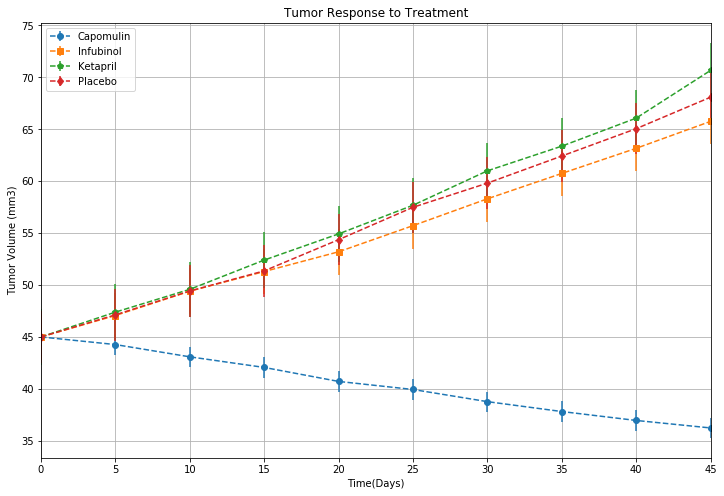

In [6]:
# Generate the Plot (with Error Bars)
Timepoint = tumor_volume.index
plt.figure(figsize=(12,8))
plt.errorbar(Timepoint, tumor_volume['Capomulin'],yerr=tumor_volume['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin")

plt.errorbar(Timepoint, tumor_volume['Infubinol'],yerr=tumor_volume['Infubinol'].sem(), marker ='s', linestyle='--', label="Infubinol")
plt.errorbar(Timepoint, tumor_volume['Ketapril'],yerr=tumor_volume['Ketapril'].sem(), marker ='p', linestyle='--', label="Ketapril")

plt.errorbar(Timepoint, tumor_volume['Placebo'],yerr=tumor_volume['Placebo'].sem(), marker ='d', linestyle='--', label="Placebo")

plt.gca().set(xlabel = 'Time(Days)', ylabel = 'Tumor Volume (mm3)',title = 'Tumor Response to Treatment',xlim = (0,max(Timepoint)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()
# Save the Figure



In [7]:
# Generate the Plot (with Error Bars)

# Save the Figure

In [8]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_sites = pd.DataFrame(complete.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean())
metastatic_sites.head()
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
metastatic_sites = pd.DataFrame(metastatic_sites).reset_index()
metastatic_sites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sem = pd.DataFrame(complete.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem())
metastatic_sem.head()
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [12]:
metastatic_sem = pd.DataFrame(metastatic_sem).reset_index()
metastatic_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [13]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_sites = pd.pivot_table(complete, index='Timepoint', columns='Drug', values='Metastatic Sites', aggfunc = np.mean)
metastatic_sites
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


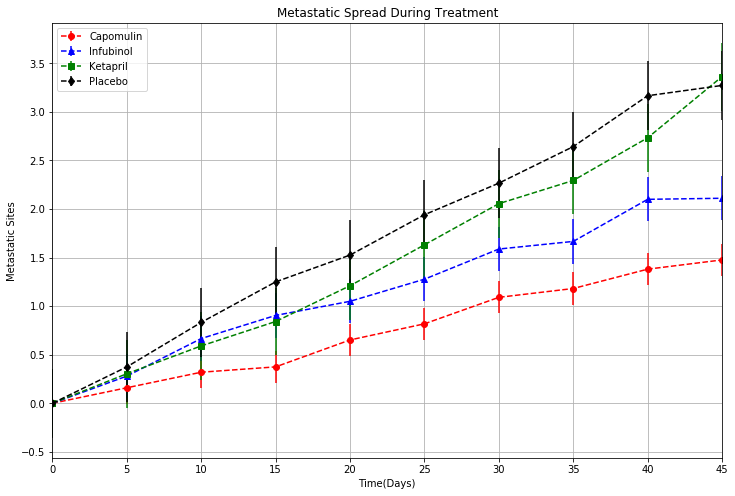

In [14]:
# Generate the Plot (with Error Bars)
Timepoint = metastatic_sites.index
plt.figure(figsize=(12,8))
plt.errorbar(Timepoint, metastatic_sites['Capomulin'],yerr=metastatic_sites['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin", color="red")

plt.errorbar(Timepoint, metastatic_sites['Infubinol'],yerr=metastatic_sites['Infubinol'].sem(), marker ='^', linestyle='--', label="Infubinol", color="blue")
plt.errorbar(Timepoint, metastatic_sites['Ketapril'],yerr=metastatic_sites['Ketapril'].sem(), marker ='s', linestyle='--', label="Ketapril", color="green")

plt.errorbar(Timepoint, metastatic_sites['Placebo'],yerr=metastatic_sites['Placebo'].sem(), marker ='d', linestyle='--', label="Placebo", color="black")

plt.gca().set(xlabel = 'Time(Days)', ylabel = 'Metastatic Sites',title = 'Metastatic Spread During Treatment',xlim = (0,max(Timepoint)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()
# Save the Figure

# Show the Figure


## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_num = pd.DataFrame(complete.groupby(["Drug","Timepoint"])["Mouse ID"].count())
mouse_num.head()
# Convert to DataFrame

# Preview DataFrame


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [16]:
mouse_num = pd.DataFrame(mouse_num).reset_index()
mouse_num.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
# Minor Data Munging to Re-Format the Data Frames
mouse_num = pd.pivot_table(mouse_num, index='Timepoint', columns='Drug', values='Mouse ID', aggfunc = np.mean)
mouse_num
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


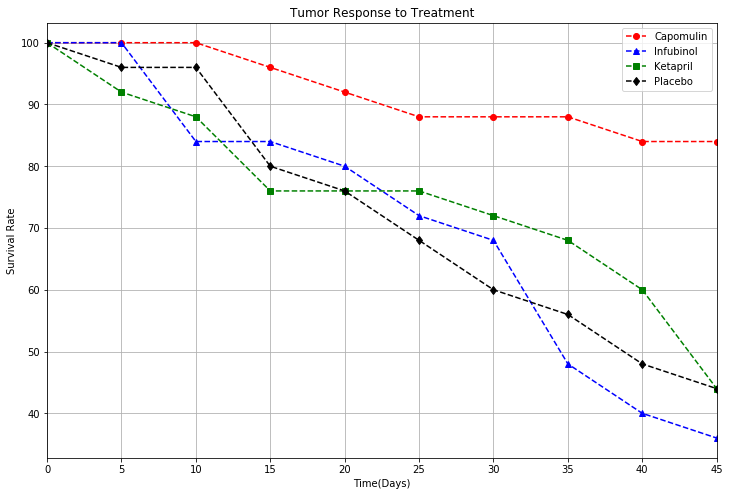

In [18]:
# Generate the Plot (Accounting for percentages)
# Generate the Plot (with Error Bars)
Timepoint = mouse_num.index
plt.figure(figsize=(12,8))

plt.errorbar(Timepoint, mouse_num['Capomulin']/mouse_num.loc[0,"Capomulin"]*100, marker ='o', linestyle='--',
             label="Capomulin", color="red")

plt.errorbar(Timepoint, mouse_num['Infubinol']/mouse_num.loc[0,"Infubinol"]*100, marker ='^', linestyle='--',
             label="Infubinol", color="blue")
plt.errorbar(Timepoint, mouse_num['Ketapril']/mouse_num.loc[0, "Ketapril"]*100, marker ='s', linestyle='--',
             label="Ketapril", color="green")

plt.errorbar(Timepoint, mouse_num['Placebo']/mouse_num.loc[0,"Placebo"]*100, marker ='d', linestyle='--',
             label="Placebo", color="black")

plt.gca().set(xlabel = 'Time(Days)', ylabel = 'Survival Rate',title = 'Tumor Response to Treatment',xlim = (0,max(Timepoint)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()
# Save the Figure

# Show the Figure


In [19]:
plt.show()

## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug
tumor_change = ((tumor_volume.loc[45, :] - tumor_volume.loc[0, :])/tumor_volume.loc[0, :] * 100)
tumor_change
# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

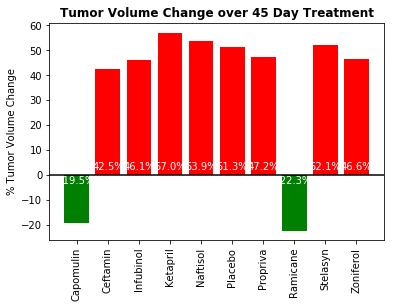

In [21]:
drugs = complete["Drug"].unique()
# Store all Relevant Percent Changes into a Tuple

    

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 
plt.title('Tumor Volume Change over 45 Day Treatment', fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('% Tumor Volume Change')
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
xlabels = tumor_change.index
#puts drug names as labels
plt.xticks(np.arange(len(xlabels)), xlabels, rotation="vertical")

# Use functions to label the percentages of changes
plt.bar(np.arange(len(drugs)), 
        tumor_change, 
        # colors each bar appropriately based on + or - values by using a conditional
        color = ['red' if tumor_change[r] > 0 else 'green' for r in np.arange(len(xlabels))]
       )

#count for x coordinate location of value label
count = 0

# Call functions to implement the function calls
for r in tumor_change:
    if r < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(r, 1)) + '%', ha = 'center', color = 'white')
    count += 1

# Save the Figure


# Show the Figure

plt.show()